# Get CHILDES frequency counts

We'd like to regress the **systematicity** of particular words against their **frequency** in the CHILDES corpus. Although previous work (Monaghan et al, 2014) found no relationship between frequency and systematicity, it's possible that more systematic words are used more frequently in child-directed speech in particular. 

For our frequency data, we use the counts derived by Ping Li, found [here](https://childes.talkbank.org/derived/parentfreq.cdc).

As noted in the link, this dataset includes:

* 24156 unique types
* 2579966 total words

## Read in file

In [1]:
with open("data/raw/childes/parentfreq.txt", "r") as data_file:
    frequency_file = data_file.read()

In [2]:
rows = frequency_file.split("\n")
rows[0]

'124219 you'

In [15]:
words_to_counts = [(float(s.split()[0]), s.split()[1]) for s in rows]

## Build dataframe

In [16]:
import pandas as pd
frequencies_df = pd.DataFrame(words_to_counts, columns=['childes_frequency', 'word'])

In [17]:
frequencies_df.head(5)

,childes_frequency,word
0,124219.0,you
1,81029.0,the
2,59629.0,it
3,56952.0,a
4,51760.0,to


In [18]:
frequencies_df['childes_frequency_normalized'] = frequencies_df['childes_frequency'] / sum(frequencies_df['childes_frequency'])

In [19]:
frequencies_df.head(5)

,childes_frequency,word,childes_frequency_normalized
0,124219.0,you,0.048148
1,81029.0,the,0.031407
2,59629.0,it,0.023112
3,56952.0,a,0.022075
4,51760.0,to,0.020062


## Write to file

In [20]:
frequencies_df.to_csv("data/processed/childes_frequencies.csv")

## Correlate with systematicity

In [21]:
systematicity_df = pd.read_csv("data/processed/words_plus_systematicity.csv")

In [22]:
systematicity_df.head(5)

,Unnamed: 0,impact,word,word_length
0,0,-0.000065,skein,5
1,1,-0.000035,dart,4
2,2,-0.000077,die,3
3,3,-0.000103,fruits,6
4,4,-0.000138,dude,4


In [23]:
merged = pd.merge(systematicity_df, frequencies_df)

In [24]:
len(merged)

1362

In [25]:
merged.head(5)

,Unnamed: 0,impact,word,word_length,childes_frequency,childes_frequency_normalized
0,1,-0.000035,dart,4,13.0,0.000005
1,2,-0.000077,die,3,80.0,0.000031
2,3,-0.000103,fruits,6,14.0,0.000005
3,4,-0.000138,dude,4,3.0,0.000001
4,5,-0.000038,bolt,4,79.0,0.000031


In [28]:
from statsmodels.formula.api import ols

In [30]:
model = ols("impact ~ childes_frequency_normalized", merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 impact   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.604
Date:                Thu, 27 Sep 2018   Prob (F-statistic):             0.0181
Time:                        14:28:31   Log-Likelihood:                 10065.
No. Observations:                1362   AIC:                        -2.013e+04
Df Residuals:                    1360   BIC:                        -2.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -3.102e-06   4.09e-06     -0.759      0.448   -1.11e-05    4.92e-06
childes_frequency_normalized    -0.0059      0.003     -2.367      0.018      -0.011      -0.001
==============================================================================
Omnibus:                      448.922   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5013.578
Skew:                          -1.200   Prob(JB):                         0.00
Kurtosis:                      12.088   Cond. No.                         617.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

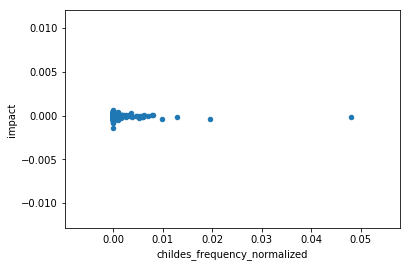

In [32]:
import matplotlib.pyplot as plt
merged.plot.scatter(x="childes_frequency_normalized", y="impact")